In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

import scipy.stats as stat
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
#| label: reading-csv
# Read the CSV file into a DataFrame and set the "Date" column as the index
df = pd.read_csv("companies_and_stock_info", parse_dates=["Date"])
df.head()

,company_name,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
0,apple,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.956809,691992000,0.000000,0.000000
1,apple,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.966635,1096810400,0.000220,0.000122
2,apple,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.975101,680433600,0.000543,0.000295
3,apple,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.975857,705555200,0.000704,0.000434
4,apple,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.046911,2227450400,0.003604,0.001377


In [3]:
#| label: define-dictionary-mapping-each-company
# Define a dictionary mapping each company to its sector
sector_mapping = {
    'apple': 'Technology',
    'microsoft': 'Technology',
    'google': 'Technology',
    'jpmc': 'Finance',
    'boa': 'Finance',
    'wfc': 'Finance',
    'jnj': 'Healthcare',
    'pfizer': 'Healthcare',
    'merck': 'Healthcare',
    'exxon': 'Energy',
    'chevron': 'Energy',
    'facebook': 'Communication',
    'verizon': 'Communication',
    'atnt': 'Communication'
}

df['Sector'] = df['company_name'].map(sector_mapping)

df.head()

,company_name,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Sector
0,apple,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.956809,691992000,0.000000,0.000000,Technology
1,apple,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.966635,1096810400,0.000220,0.000122,Technology
2,apple,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.975101,680433600,0.000543,0.000295,Technology
3,apple,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.975857,705555200,0.000704,0.000434,Technology
4,apple,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.046911,2227450400,0.003604,0.001377,Technology


<Axes: xlabel='Sector', ylabel='Close'>

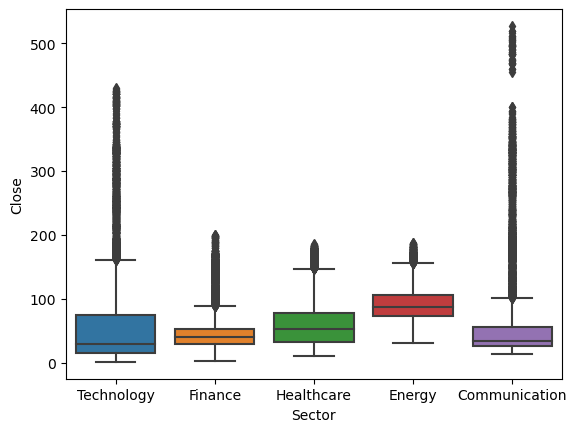

In [4]:
#| label: title-distribution-of-close-price-by-sector
# @title Distribution of Close Price by Sector

sns.boxplot(data=df, x="Sector", y="Close")

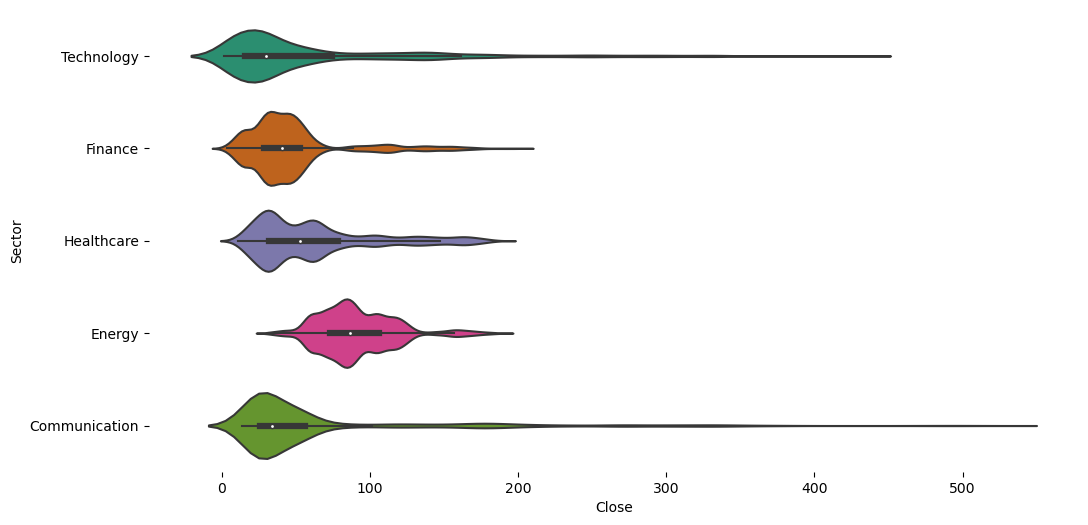

In [5]:
#| label: Sector-vs-close
# @title Sector vs Close

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sector'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Close', y='Sector', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Epoch 1/5


/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0032
Epoch 2/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4.2172e-04
Epoch 3/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.3287e-04
Epoch 4/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.8024e-04
Epoch 5/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.9524e-04
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


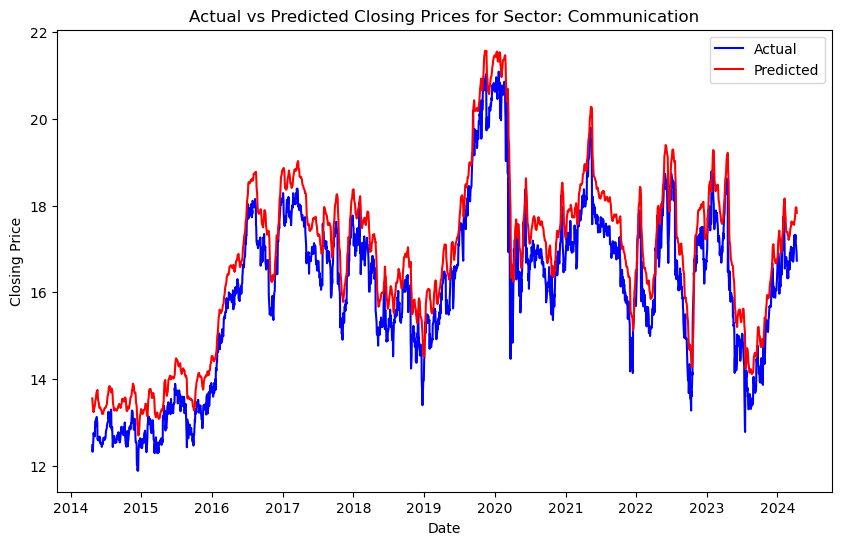

Epoch 1/5


/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0051
Epoch 2/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.7868e-04
Epoch 3/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.7708e-04
Epoch 4/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.6802e-04
Epoch 5/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.9529e-04
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


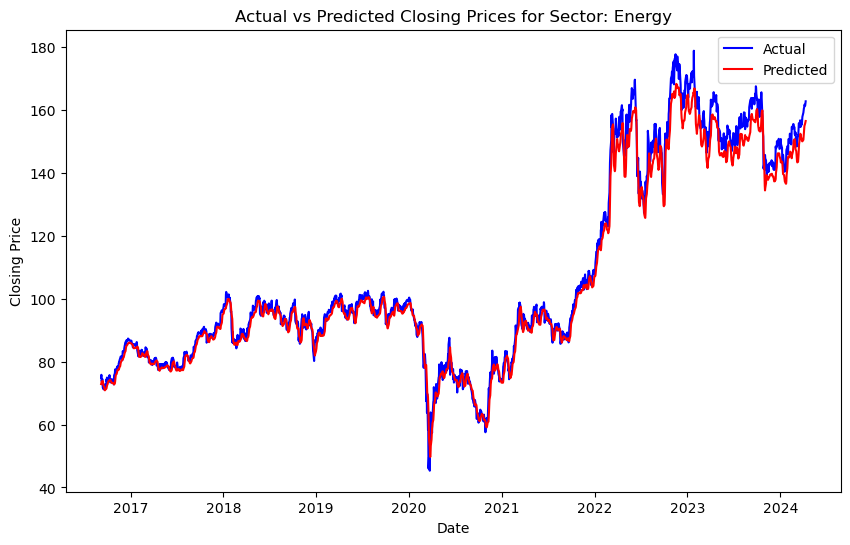

Epoch 1/5


/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0044
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.0907e-04
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.0815e-04
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.4153e-04
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.9925e-04
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


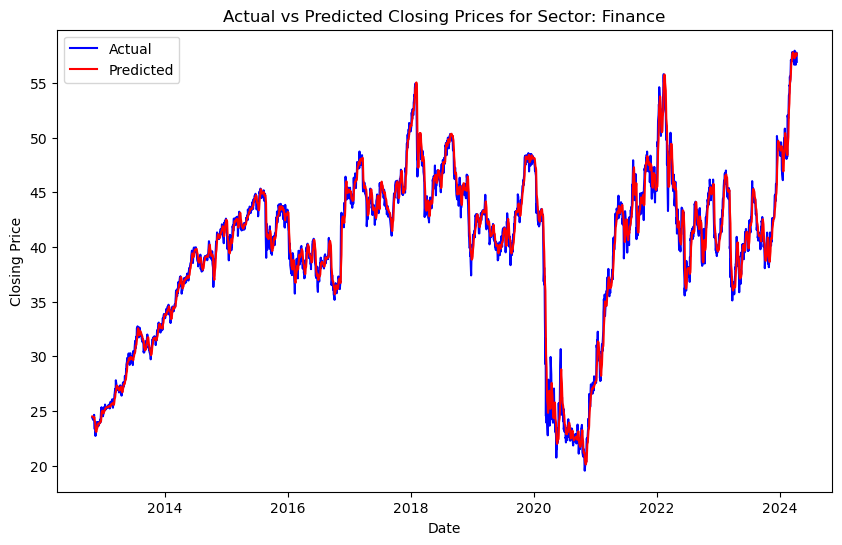

Epoch 1/5


/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0057
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 4.9057e-04
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2.8027e-04
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 2.9913e-04
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 3.1296e-04
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


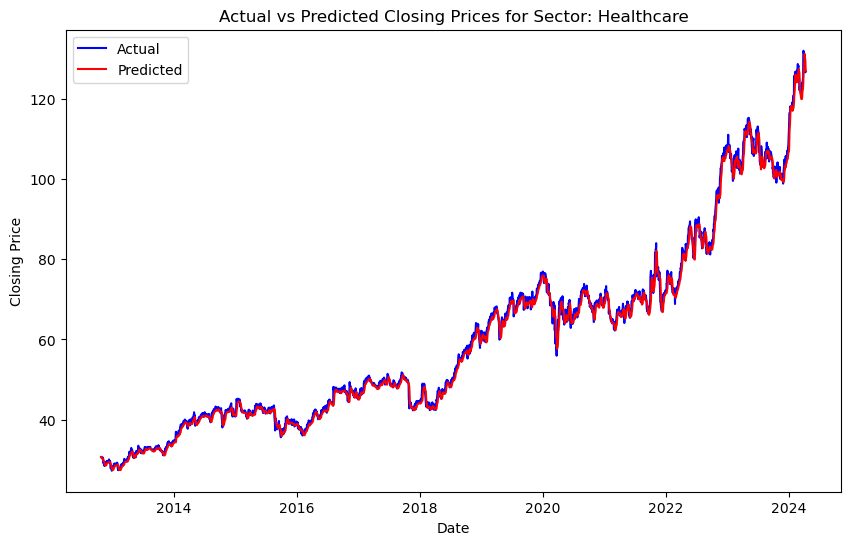

Epoch 1/5


/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0048
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 3.1306e-04
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 4.0131e-04
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 1.9859e-04
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 3.6050e-04
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


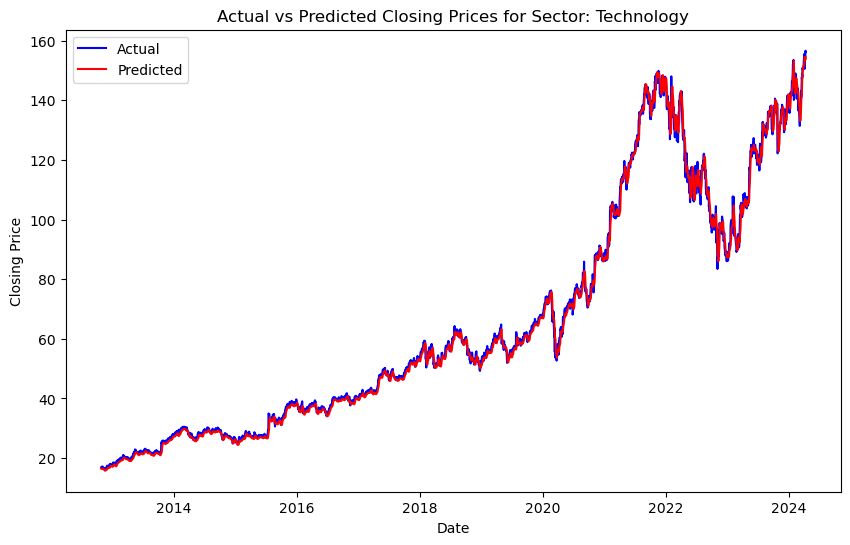

In [6]:
#| label: lstm-model
for sector, sector_data in df.groupby('Sector'):
    sector_data = sector_data[['Date', 'Adj Close']]

    sector_data.set_index('Date', inplace=True)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(sector_data)

    train_size = int(len(scaled_data) * 0.8)
    test_size = len(scaled_data) - train_size
    train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

    def create_dataset(dataset, time_steps=1):
        X, Y = [], []
        for i in range(len(dataset) - time_steps):
            X.append(dataset[i:(i + time_steps), 0])
            Y.append(dataset[i + time_steps, 0])
        return np.array(X), np.array(Y)

    time_steps = 30
    X_train, Y_train = create_dataset(train_data, time_steps)
    X_test, Y_test = create_dataset(test_data, time_steps)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=5, batch_size=32)

    plt.show()

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)  # Inverse scaling

    residuals = Y_test - predictions

    plt.figure(figsize=(10, 6))
    plt.plot(sector_data.index[train_size + time_steps:], scaler.inverse_transform(test_data)[time_steps:], label='Actual', color='blue')
    plt.plot(sector_data.index[train_size + time_steps:], predictions, label='Predicted', color='red')
    plt.title(f'Actual vs Predicted Closing Prices for Sector: {sector}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()